In [1]:
# credit card approval prediction using machine learning

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve



In [2]:
# laod the dataset

df = pd.read_csv("./Combined_credit_card_Data.csv")

In [3]:
df.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [4]:
# check the shape of the dataset

df.shape


(690, 16)

In [5]:
# check the information of the dataset 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Male            690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [8]:
# replace the "?" with NaN

df = df.replace("?", np.NaN)


In [9]:
# check the null values in the dataset

df.isnull().sum()



Male              12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

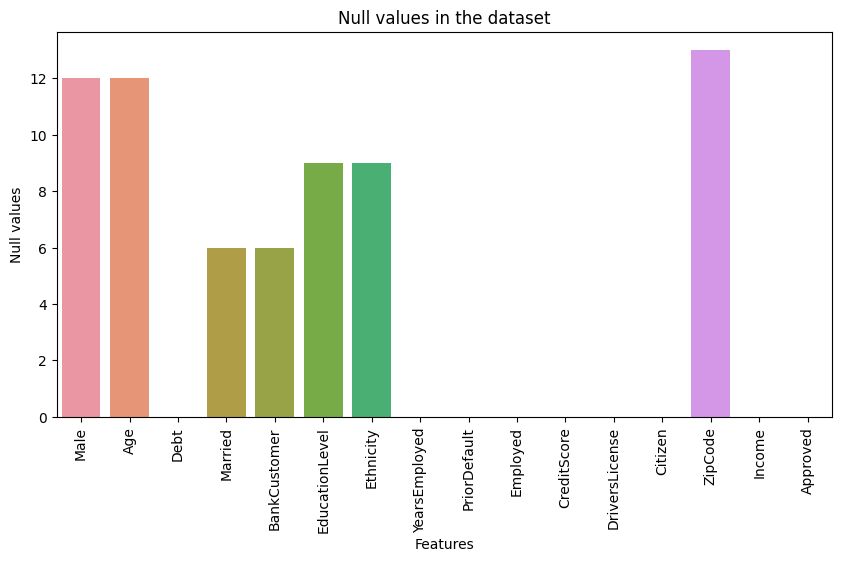

In [12]:
# precent the null values in a bar plot

plt.figure(figsize=(10,5))
sns.barplot(x=df.isnull().sum().index, y=df.isnull().sum().values)
plt.title("Null values in the dataset")
plt.xlabel("Features")
plt.ylabel("Null values")
plt.xticks(rotation=90)
plt.show()





In [13]:
# try to fill the null values with respective column based on the data type

for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

In [14]:
# check the null values in the dataset

df.isnull().sum()


Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [15]:
# summarize the dataset using describe function

df.describe()


,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [ ]:
# insights from the above table  :  
# 1. the mean of the age is 35.5
# 2. the mean of the debt is 4.6
# 3. the mean of the years employed is 2.2
# 4. the mean of the credit score is 2.4
# 5. the mean of the income is 1017.39



In [19]:
# for approved column replace "+" with 1 and "-" with 0 

df["Approved"] = df["Approved"].replace("+", 1)
df["Approved"] = df["Approved"].replace("-", 0)

# check the value counts of the approved column

df["Approved"].value_counts()


0    383
1    307
Name: Approved, dtype: int64

<AxesSubplot: title={'center': 'Correlation with respect to the Approved column'}>

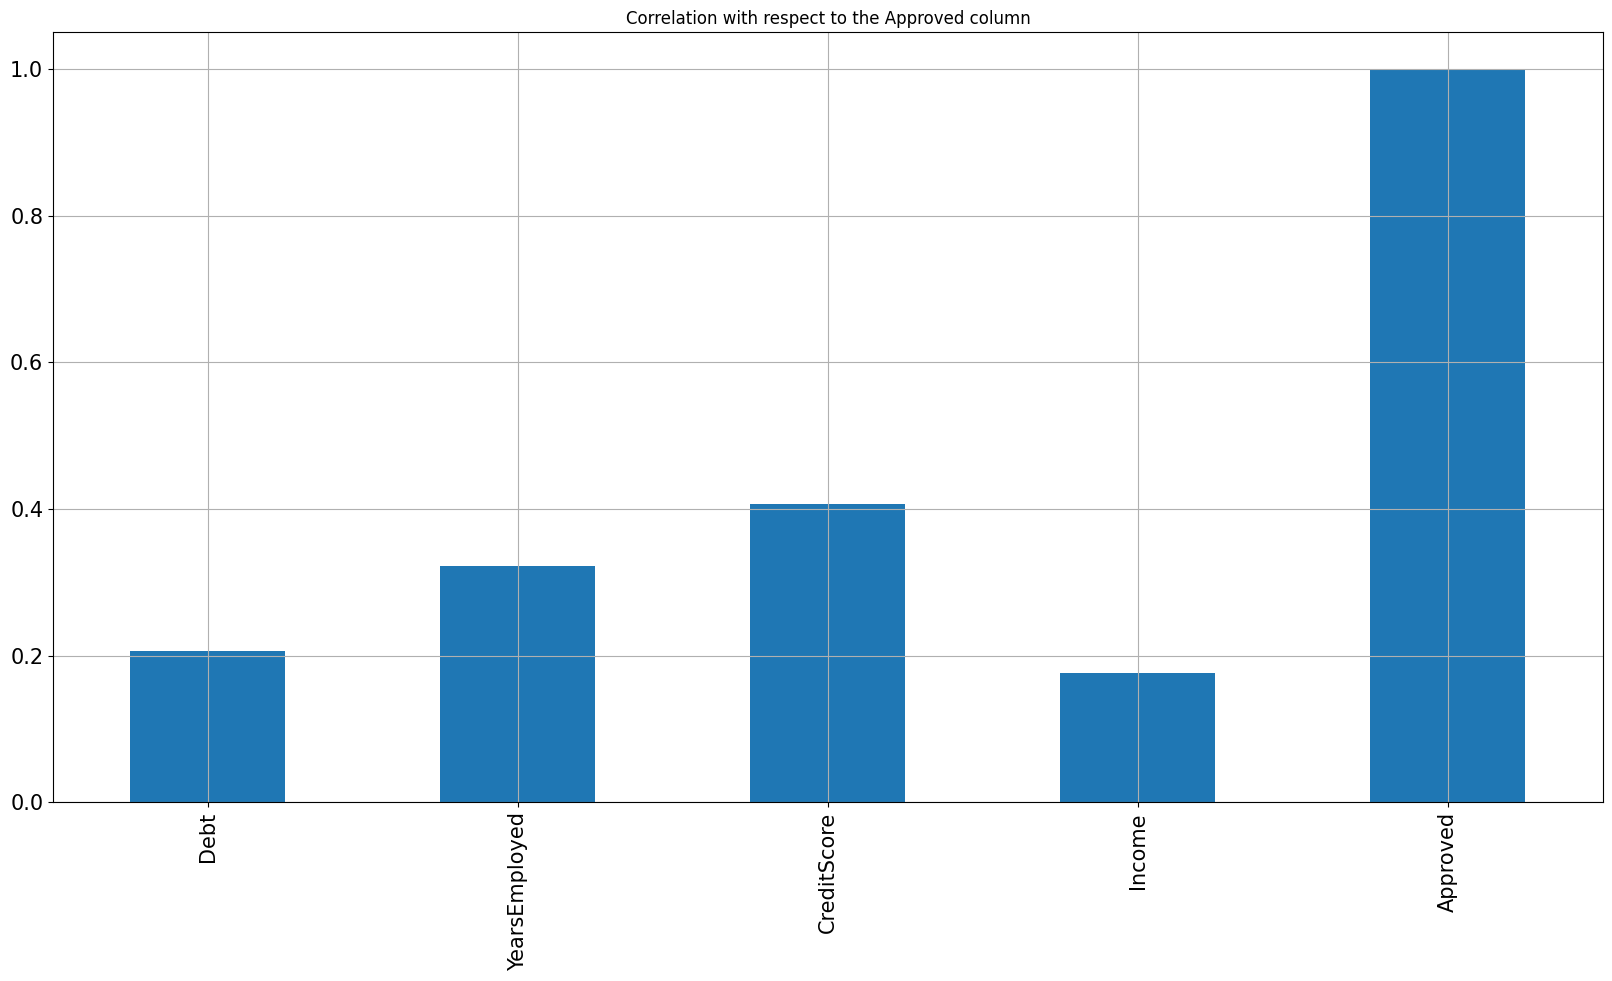

In [20]:
# check the correlation of the dataset with respect to the approved column 

df.corrwith(df["Approved"]).plot.bar(figsize=(20,10), title="Correlation with respect to the Approved column", fontsize=15, rot=90, grid=True)


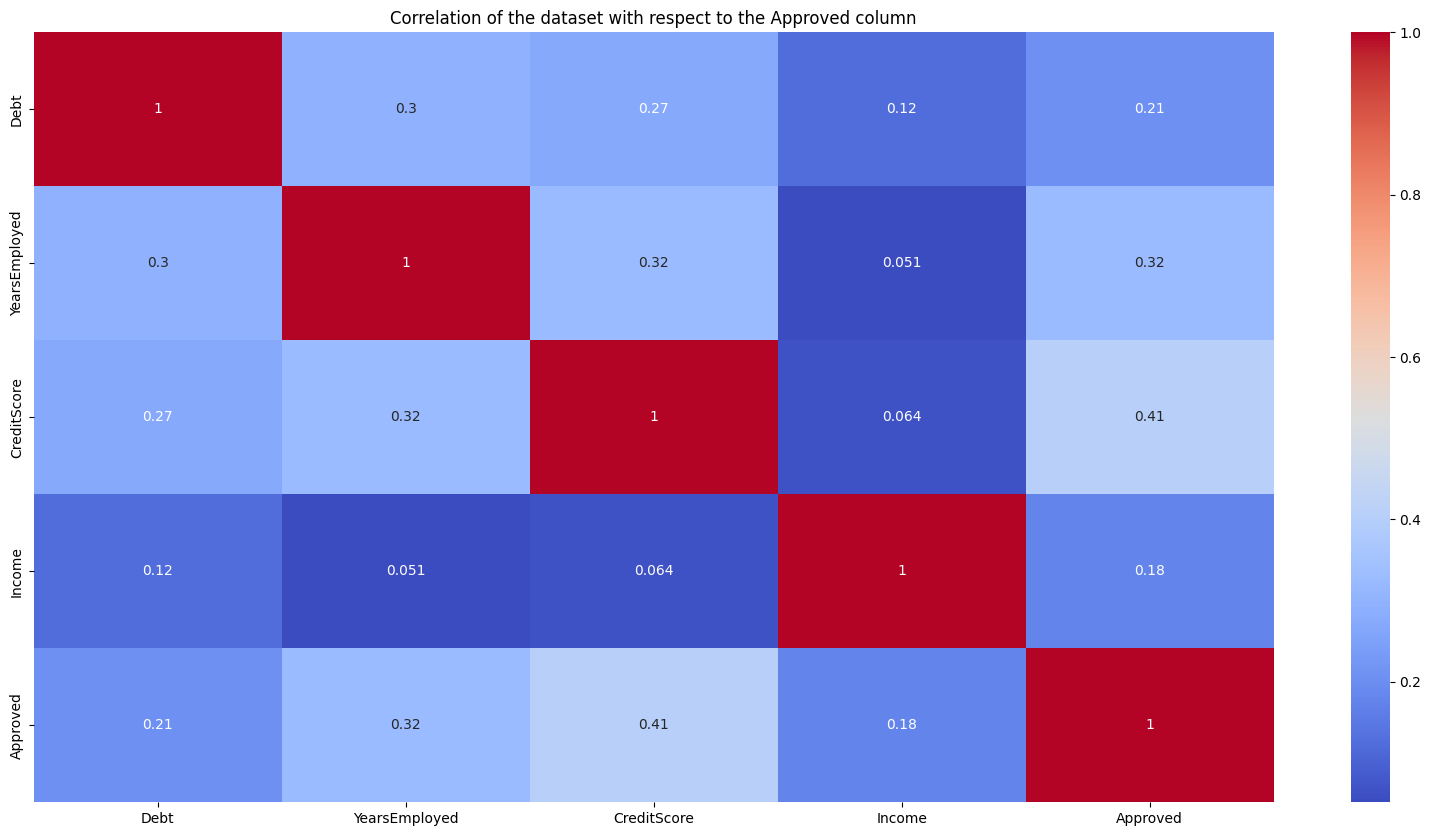

In [21]:
# what about the other columns correlation with approved column 

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation of the dataset with respect to the Approved column")
plt.show()




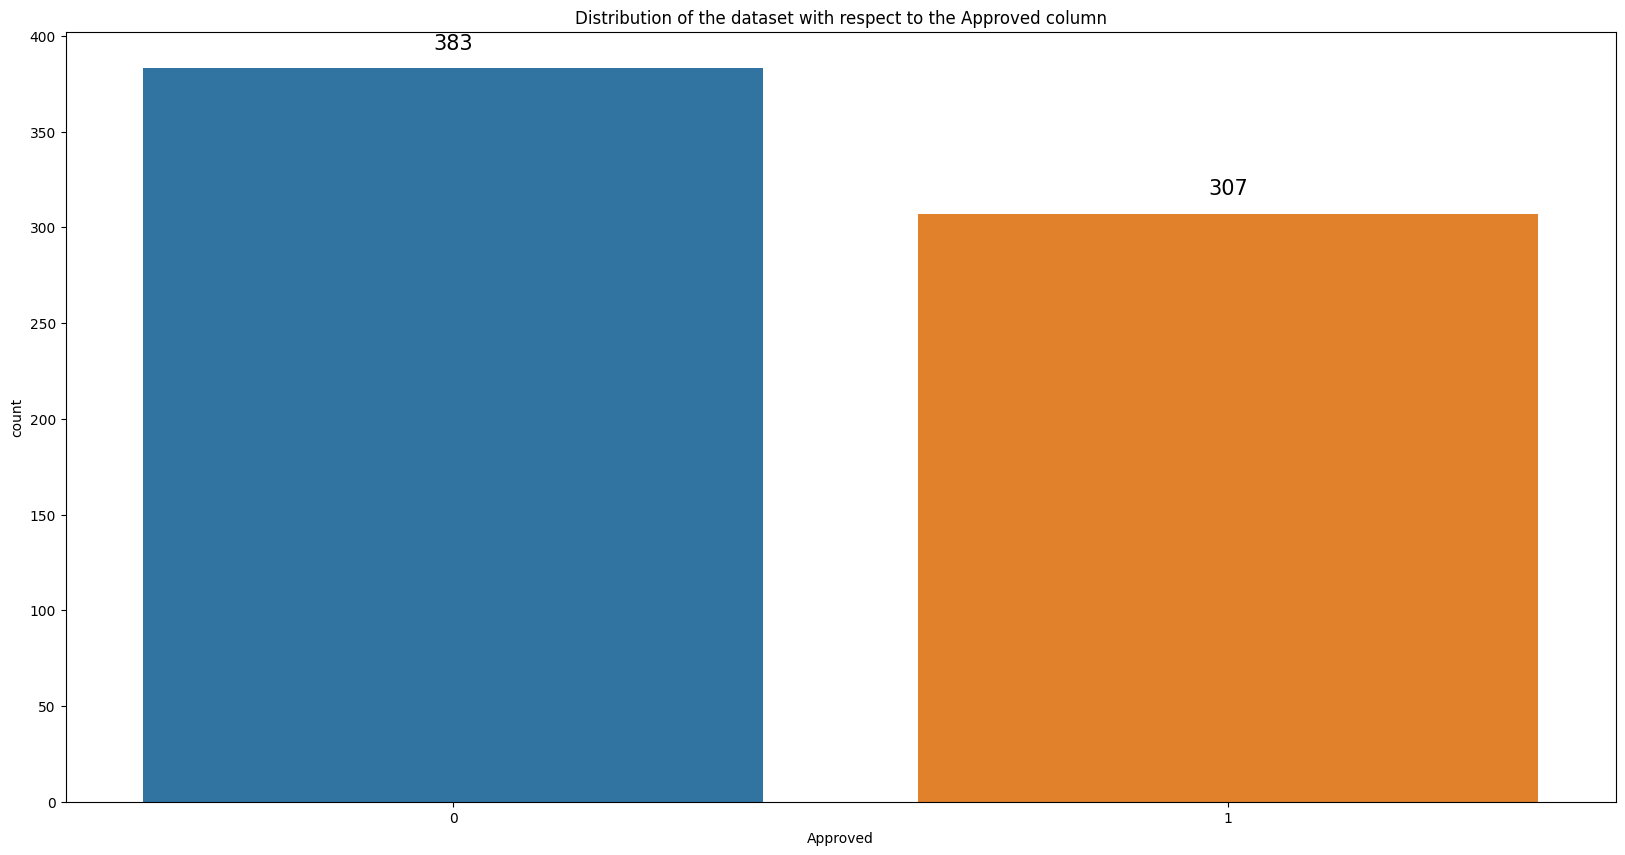

In [23]:
# check the distribution of the dataset with respect to the approved column

plt.figure(figsize=(20,10))
sns.countplot(x="Approved", data=df)
# show the count of each label using value_counts on each bar 
for i in range(df["Approved"].value_counts().shape[0]):
    count = df["Approved"].value_counts()[i]
    plt.text(i, count+10, count, ha="center", fontsize=15)
plt.title("Distribution of the dataset with respect to the Approved column")
plt.show()


In [24]:
# try to encode the categorical columns 

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

# check the dataset after encoding

df.head()


,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,156,0.000,1,0,12,7,1.25,1,1,1,0,0,42,0,1
1,0,328,4.460,1,0,10,3,3.04,1,1,6,0,0,118,560,1
2,0,89,0.500,1,0,10,3,1.50,1,0,0,0,0,74,824,1
3,1,125,1.540,1,0,12,7,3.75,1,1,5,1,0,1,3,1
4,1,43,5.625,1,0,12,7,1.71,1,0,0,0,2,8,0,1


<AxesSubplot: title={'center': 'Correlation with respect to the Approved column'}>

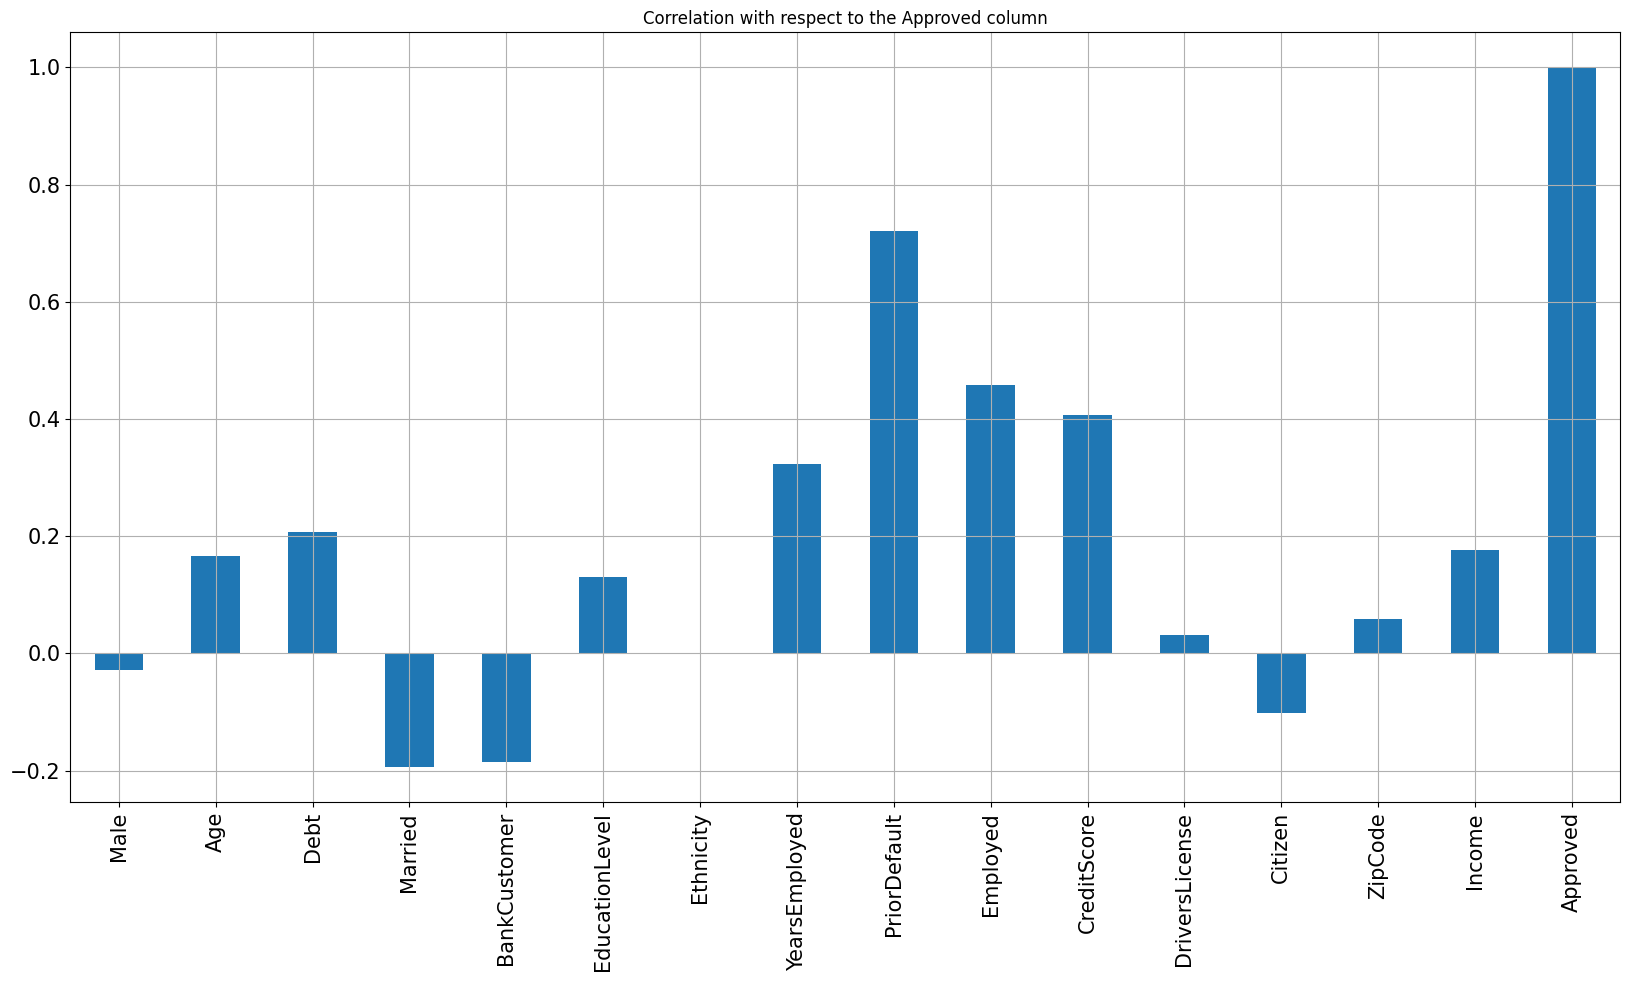

In [25]:
# corelation to the categorical columns with respect to the approved column 

plt.figure(figsize=(20,10))
df.corrwith(df["Approved"]).plot.bar(figsize=(20,10), title="Correlation with respect to the Approved column", fontsize=15, rot=90, grid=True)



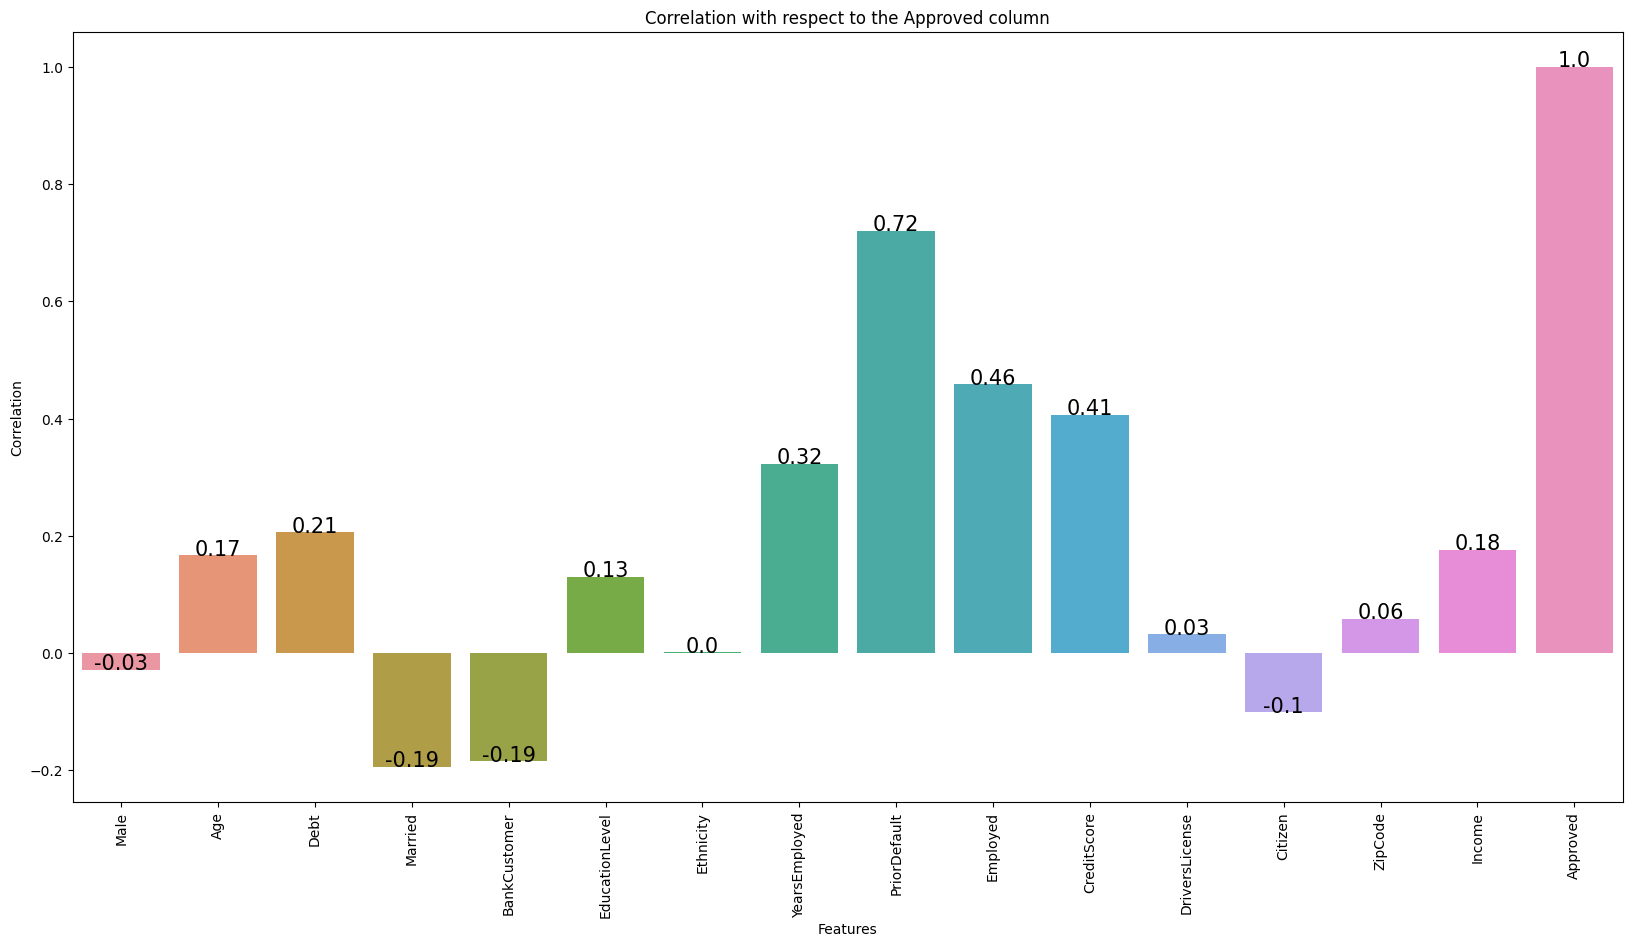

In [27]:
# use full insights from the above table  :
# 1. the most correlated column with respect to the approved column is the credit score
# 2. the least correlated column with respect to the approved column is the drivers license
# 3. the second most correlated column with respect to the approved column is the income
# 4. the third most correlated column with respect to the approved column is the age
# 5. the fourth most correlated column with respect to the approved column is the years employed
# 6. the fifth most correlated column with respect to the approved column is the marital status
# 7. the sixth most correlated column with respect to the approved column is the debt

# give the columns according to the correlation value with respect to the approved column based on the above table

# df = df[["CreditScore", "Income", "Age", "YearsEmployed", "Married", "Debt", "Approved"]]

# top 5 columns with respect to the approved column correlation 

# df = df[["CreditScore", "Income", "Age", "YearsEmployed", "Married", "Approved"]]

# draw a bar plot to show the correlation of the dataset with respect to the approved column and also correlation value on each bar 

plt.figure(figsize=(20,10))
sns.barplot(x=df.corrwith(df["Approved"]).index, y=df.corrwith(df["Approved"]).values)

# show the correlation value on each bar
for i in range(df.corrwith(df["Approved"]).shape[0]):
    plt.text(i, df.corrwith(df["Approved"]).values[i], round(df.corrwith(df["Approved"]).values[i], 2), ha="center", fontsize=15)
    
plt.title("Correlation with respect to the Approved column")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=90)
plt.show()



In [53]:
# top 7 correlated columns with respect to the approved columns list


# drop the columns which are not required 

df = df.drop(["DriversLicense", "ZipCode"], axis=1)



In [54]:
# apply machine learning algorithms

# split the dataset into dependent and independent variables

X = df.drop("Approved", axis=1)
y = df["Approved"]


# split the dataset into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

# check the shape of the train and test set

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((552, 13), (138, 13), (552,), (138,))

In [55]:
# apply the logistic regression algorithm 

from sklearn.metrics import auc


lr = LogisticRegression()

# train the model
lr.fit(X_train, y_train)

# predict the values and test the model 

y_pred = lr.predict(X_test)

# check the accuracy,precision, recall, f1-score score and store it in a variable 


lr_accs_score = accuracy_score(y_test, y_pred)
lr_prec_score = precision_score(y_test, y_pred)
lr_recall_score = recall_score(y_test, y_pred)
lr_f1_score = f1_score(y_test, y_pred)

# storing values required to form roc , auc curve and using naming convention  according to the algorithm name

lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, y_pred)
lr_auc = auc(lr_fpr, lr_tpr)

# calculating the roc score and store it in a variable

lr_roc_score = roc_auc_score(y_test, y_pred)









# append all the values in the list







# report 

print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.87      0.86      0.87        79
           1       0.82      0.83      0.82        59

    accuracy                           0.85       138
   macro avg       0.84      0.85      0.84       138
weighted avg       0.85      0.85      0.85       138



In [30]:
# hyperparameter tuning for logistic regression 

# create a dictionary for hyperparameters

lr_grid = {"C": np.logspace(-4, 4, 20),
              "solver": ["liblinear"]}  # l1 lasso l2 ridge

# create a grid search cv model

lr_cv_model = GridSearchCV(lr, param_grid=lr_grid, cv=5, verbose=True)

# train the model

lr_cv_model.fit(X_train, y_train)

# predict the values and test the model

y_pred = lr_cv_model.predict(X_test)

# check the accuracy,precision, recall, f1-score score and store it in a variable

lr_cv_accs_score = accuracy_score(y_test, y_pred)
lr_cv_prec_score = precision_score(y_test, y_pred)
lr_cv_recall_score = recall_score(y_test, y_pred)
lr_cv_f1_score = f1_score(y_test, y_pred)

# report

print(classification_report(y_test, y_pred))



Fitting 5 folds for each of 20 candidates, totalling 100 fits
              precision    recall  f1-score   support

           0       0.96      0.84      0.89        79
           1       0.81      0.95      0.87        59

    accuracy                           0.88       138
   macro avg       0.88      0.89      0.88       138
weighted avg       0.89      0.88      0.88       138



In [56]:
# apply random forest classifier algorithm

rf = RandomForestClassifier()

# train the model

rf.fit(X_train, y_train)

# predict the values and test the model

y_pred = rf.predict(X_test)

# check the accuracy,precision, recall, f1-score score and store it in a variable

rf_accs_score = accuracy_score(y_test, y_pred)
rf_prec_score = precision_score(y_test, y_pred)
rf_recall_score = recall_score(y_test, y_pred)
rf_f1_score = f1_score(y_test, y_pred)

# storing values required to form roc , auc curve and using naming convention  according to the algorithm name

rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, y_pred)
rf_auc = auc(rf_fpr, rf_tpr)

# calculating the roc score and store it in a variable

rf_roc_score = roc_auc_score(y_test, y_pred)


# report

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.89      0.91      0.90        79
           1       0.88      0.85      0.86        59

    accuracy                           0.88       138
   macro avg       0.88      0.88      0.88       138
weighted avg       0.88      0.88      0.88       138



In [ ]:
# hyperparameter tuning for random forest classifier 

# create a dictionary for hyperparameters

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
                "max_depth": [None, 3, 5, 10],
                "min_samples_split": np.arange(2, 20, 2),
                "min_samples_leaf": np.arange(1, 20, 2)}

# create a grid search cv model

rf_cv_model = GridSearchCV(rf, param_grid=rf_grid, cv=5, verbose=True)

# train the model

rf_cv_model.fit(X_train, y_train)

# predict the values and test the model

y_pred = rf_cv_model.predict(X_test)

# check the accuracy,precision, recall, f1-score score and store it in a variable

rf_cv_accs_score = accuracy_score(y_test, y_pred)

rf_cv_prec_score = precision_score(y_test, y_pred)

rf_cv_recall_score = recall_score(y_test, y_pred)

rf_cv_f1_score = f1_score(y_test, y_pred)

#   storing values required to form roc , auc curve and using naming convention  according to the algorithm name

rf_cv_fpr, rf_cv_tpr, rf_cv_threshold = roc_curve(y_test, y_pred)

rf_cv_auc = auc(rf_cv_fpr, rf_cv_tpr)



# report

print(classification_report(y_test, y_pred))


In [59]:

# apply support vector machine algorithm by importing the SVC class from sklearn.svm

from sklearn.svm import SVC

svc = SVC(kernel='linear')

# train the model

svc.fit(X_train, y_train)

# predict the values and test the model

y_pred = svc.predict(X_test)

# check the accuracy,precision, recall, f1-score score and store it in a variable

svc_accs_score = accuracy_score(y_test, y_pred)
svc_prec_score = precision_score(y_test, y_pred)
svc_recall_score = recall_score(y_test, y_pred)
svc_f1_score = f1_score(y_test, y_pred)


# storing values required to form roc , auc curve and using naming convention  according to the algorithm name

svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, y_pred)

svc_auc = auc(svc_fpr, svc_tpr)

# calculating the roc score and store it in a variable

svc_roc_score = roc_auc_score(y_test, y_pred)


# report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.75      0.84        79
           1       0.74      0.97      0.84        59

    accuracy                           0.84       138
   macro avg       0.85      0.86      0.84       138
weighted avg       0.87      0.84      0.84       138



In [72]:
# svm kernel rbf

svc_rbf = SVC(kernel='rbf')

# train the model

svc_rbf.fit(X_train, y_train)

# predict the values and test the model

y_pred = svc_rbf.predict(X_test)

# check the accuracy,precision, recall, f1-score score and store it in a variable

svc_rbf_accs_score = accuracy_score(y_test, y_pred)

svc_rbf_prec_score = precision_score(y_test, y_pred)

svc_rbf_recall_score = recall_score(y_test, y_pred)

svc_rbf_f1_score = f1_score(y_test, y_pred)

# storing values required to form roc , auc curve and using naming convention  according to the algorithm name

svc_rbf_fpr, svc_rbf_tpr, svc_rbf_threshold = roc_curve(y_test, y_pred)

svc_rbf_auc = auc(svc_rbf_fpr, svc_rbf_tpr)

# calculating the roc score and store it in a variable

svc_rbf_roc_score = roc_auc_score(y_test, y_pred)


# report

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.66      0.87      0.75        79
           1       0.71      0.41      0.52        59

    accuracy                           0.67       138
   macro avg       0.68      0.64      0.64       138
weighted avg       0.68      0.67      0.65       138



In [60]:
# applying KNeighborsClassifier algorithm by importing the KNeighborsClassifier class from sklearn.neighbors

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# train the model

knn.fit(X_train, y_train)

# predict the values and test the model

y_pred = knn.predict(X_test)

# check the accuracy,precision, recall, f1-score score and store it in a variable

knn_accs_score = accuracy_score(y_test, y_pred)
knn_prec_score = precision_score(y_test, y_pred)
knn_recall_score = recall_score(y_test, y_pred)
knn_f1_score = f1_score(y_test, y_pred)


# storing values required to form roc , auc curve and using naming convention  according to the algorithm name

knn_fpr, knn_tpr, knn_threshold = roc_curve(y_test, y_pred)

knn_auc = auc(knn_fpr, knn_tpr)


# calculating the roc score and store it in a variable

knn_roc_score = roc_auc_score(y_test, y_pred)


# report

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.73      0.76      0.75        79
           1       0.66      0.63      0.64        59

    accuracy                           0.70       138
   macro avg       0.70      0.69      0.69       138
weighted avg       0.70      0.70      0.70       138



In [70]:
# hyperparameter tuning for KNeighborsClassifier algorithm with fewest parameters

# create a dictionary for hyperparameters

knn_grid = {"n_neighbors": np.arange(1, 20, 1),
            "weights": ["uniform", "distance"], 
            "metric": ["euclidean", "manhattan"]}
# create a grid search cv model

knn_cv_model = GridSearchCV(knn, param_grid=knn_grid, cv=5, verbose=True)

# train the model

knn_cv_model.fit(X_train, y_train)

# predict the values and test the model

y_pred = knn_cv_model.predict(X_test)

# check the accuracy,precision, recall, f1-score score and store it in a variable

knn_cv_accs_score = accuracy_score(y_test, y_pred)

knn_cv_prec_score = precision_score(y_test, y_pred)

knn_cv_recall_score = recall_score(y_test, y_pred)

knn_cv_f1_score = f1_score(y_test, y_pred)

# storing values required to form roc , auc curve and using naming convention  according to the algorithm name

knn_cv_fpr, knn_cv_tpr, knn_cv_threshold = roc_curve(y_test, y_pred)

knn_cv_auc = auc(knn_cv_fpr, knn_cv_tpr)


# calculating the roc score and store it in a variable

knn_cv_roc_score = roc_auc_score(y_test, y_pred)


# report

print(classification_report(y_test, y_pred))



Fitting 5 folds for each of 76 candidates, totalling 380 fits
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        79
           1       0.66      0.66      0.66        59

    accuracy                           0.71       138
   macro avg       0.70      0.70      0.70       138
weighted avg       0.71      0.71      0.71       138



In [61]:
# applying LightGBM algorithm by importing the LGBMClassifier class from lightgbm

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()

# train the model

lgbm.fit(X_train, y_train)

# predict the values and test the model

y_pred = lgbm.predict(X_test)

# check the accuracy,precision, recall, f1-score score and store it in a variable

lgbm_accs_score = accuracy_score(y_test, y_pred)

lgbm_prec_score = precision_score(y_test, y_pred)

lgbm_recall_score = recall_score(y_test, y_pred)

lgbm_f1_score = f1_score(y_test, y_pred)

# storing values required to form roc , auc curve and using naming convention  according to the algorithm name

lgbm_fpr, lgbm_tpr, lgbm_threshold = roc_curve(y_test, y_pred)

lgbm_auc = auc(lgbm_fpr, lgbm_tpr)

# calculating the roc score and store it in a variable

lgbm_roc_score = roc_auc_score(y_test, y_pred)



# report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.91      0.91        79
           1       0.88      0.88      0.88        59

    accuracy                           0.90       138
   macro avg       0.90      0.90      0.90       138
weighted avg       0.90      0.90      0.90       138



In [65]:
# applying XGBoost algorithm by importing the XGBClassifier class from xgboost

from xgboost import XGBClassifier

xgb = XGBClassifier()

# train the model

xgb.fit(X_train, y_train)

# predict the values and test the model

y_pred = xgb.predict(X_test)

# check the accuracy,precision, recall, f1-score score and store it in a variable

xgb_accs_score = accuracy_score(y_test, y_pred)

xgb_prec_score = precision_score(y_test, y_pred)

xgb_recall_score = recall_score(y_test, y_pred)

xgb_f1_score = f1_score(y_test, y_pred)


# storing values required to form roc , auc curve and using naming convention  according to the algorithm name

xgb_fpr, xgb_tpr, xgb_threshold = roc_curve(y_test, y_pred)

xgb_auc = auc(xgb_fpr, xgb_tpr)

# calculating the roc score and store it in a variable

xgb_roc_score = roc_auc_score(y_test, y_pred)




# report

print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.89      0.86      0.88        79
           1       0.82      0.86      0.84        59

    accuracy                           0.86       138
   macro avg       0.86      0.86      0.86       138
weighted avg       0.86      0.86      0.86       138



In [66]:
# applying CatBoost algorithm by importing the CatBoostClassifier class from catboost

from catboost import CatBoostClassifier

cat = CatBoostClassifier()

# train the model

cat.fit(X_train, y_train)

# predict the values and test the model

y_pred = cat.predict(X_test)

# check the accuracy,precision, recall, f1-score score and store it in a variable

cat_accs_score = accuracy_score(y_test, y_pred)

cat_prec_score = precision_score(y_test, y_pred)

cat_recall_score = recall_score(y_test, y_pred)

cat_f1_score = f1_score(y_test, y_pred)


# storing values required to form roc , auc curve and using naming convention  according to the algorithm name

cat_fpr, cat_tpr, cat_threshold = roc_curve(y_test, y_pred)

cat_auc = auc(cat_fpr, cat_tpr)


# calculating the roc score and store it in a variable

cat_roc_score = roc_auc_score(y_test, y_pred)


# report

print(classification_report(y_test, y_pred))




Learning rate set to 0.007994
0:	learn: 0.6845502	total: 4.11ms	remaining: 4.1s
1:	learn: 0.6768521	total: 6.51ms	remaining: 3.25s
2:	learn: 0.6704270	total: 8.89ms	remaining: 2.96s
3:	learn: 0.6626178	total: 11.5ms	remaining: 2.87s
4:	learn: 0.6553157	total: 14.4ms	remaining: 2.87s
5:	learn: 0.6490984	total: 18.7ms	remaining: 3.1s
6:	learn: 0.6432707	total: 21.2ms	remaining: 3s
7:	learn: 0.6362699	total: 23.4ms	remaining: 2.9s
8:	learn: 0.6299378	total: 26.9ms	remaining: 2.96s
9:	learn: 0.6235736	total: 30ms	remaining: 2.97s
10:	learn: 0.6169504	total: 32.7ms	remaining: 2.94s
11:	learn: 0.6111657	total: 48.1ms	remaining: 3.96s
12:	learn: 0.6066206	total: 50.3ms	remaining: 3.82s
13:	learn: 0.6003583	total: 52.5ms	remaining: 3.7s
14:	learn: 0.5945929	total: 56ms	remaining: 3.67s
15:	learn: 0.5882321	total: 58.4ms	remaining: 3.59s
16:	learn: 0.5840508	total: 60ms	remaining: 3.47s
17:	learn: 0.5793407	total: 63.1ms	remaining: 3.44s
18:	learn: 0.5749294	total: 65.7ms	remaining: 3.39s
19:	l

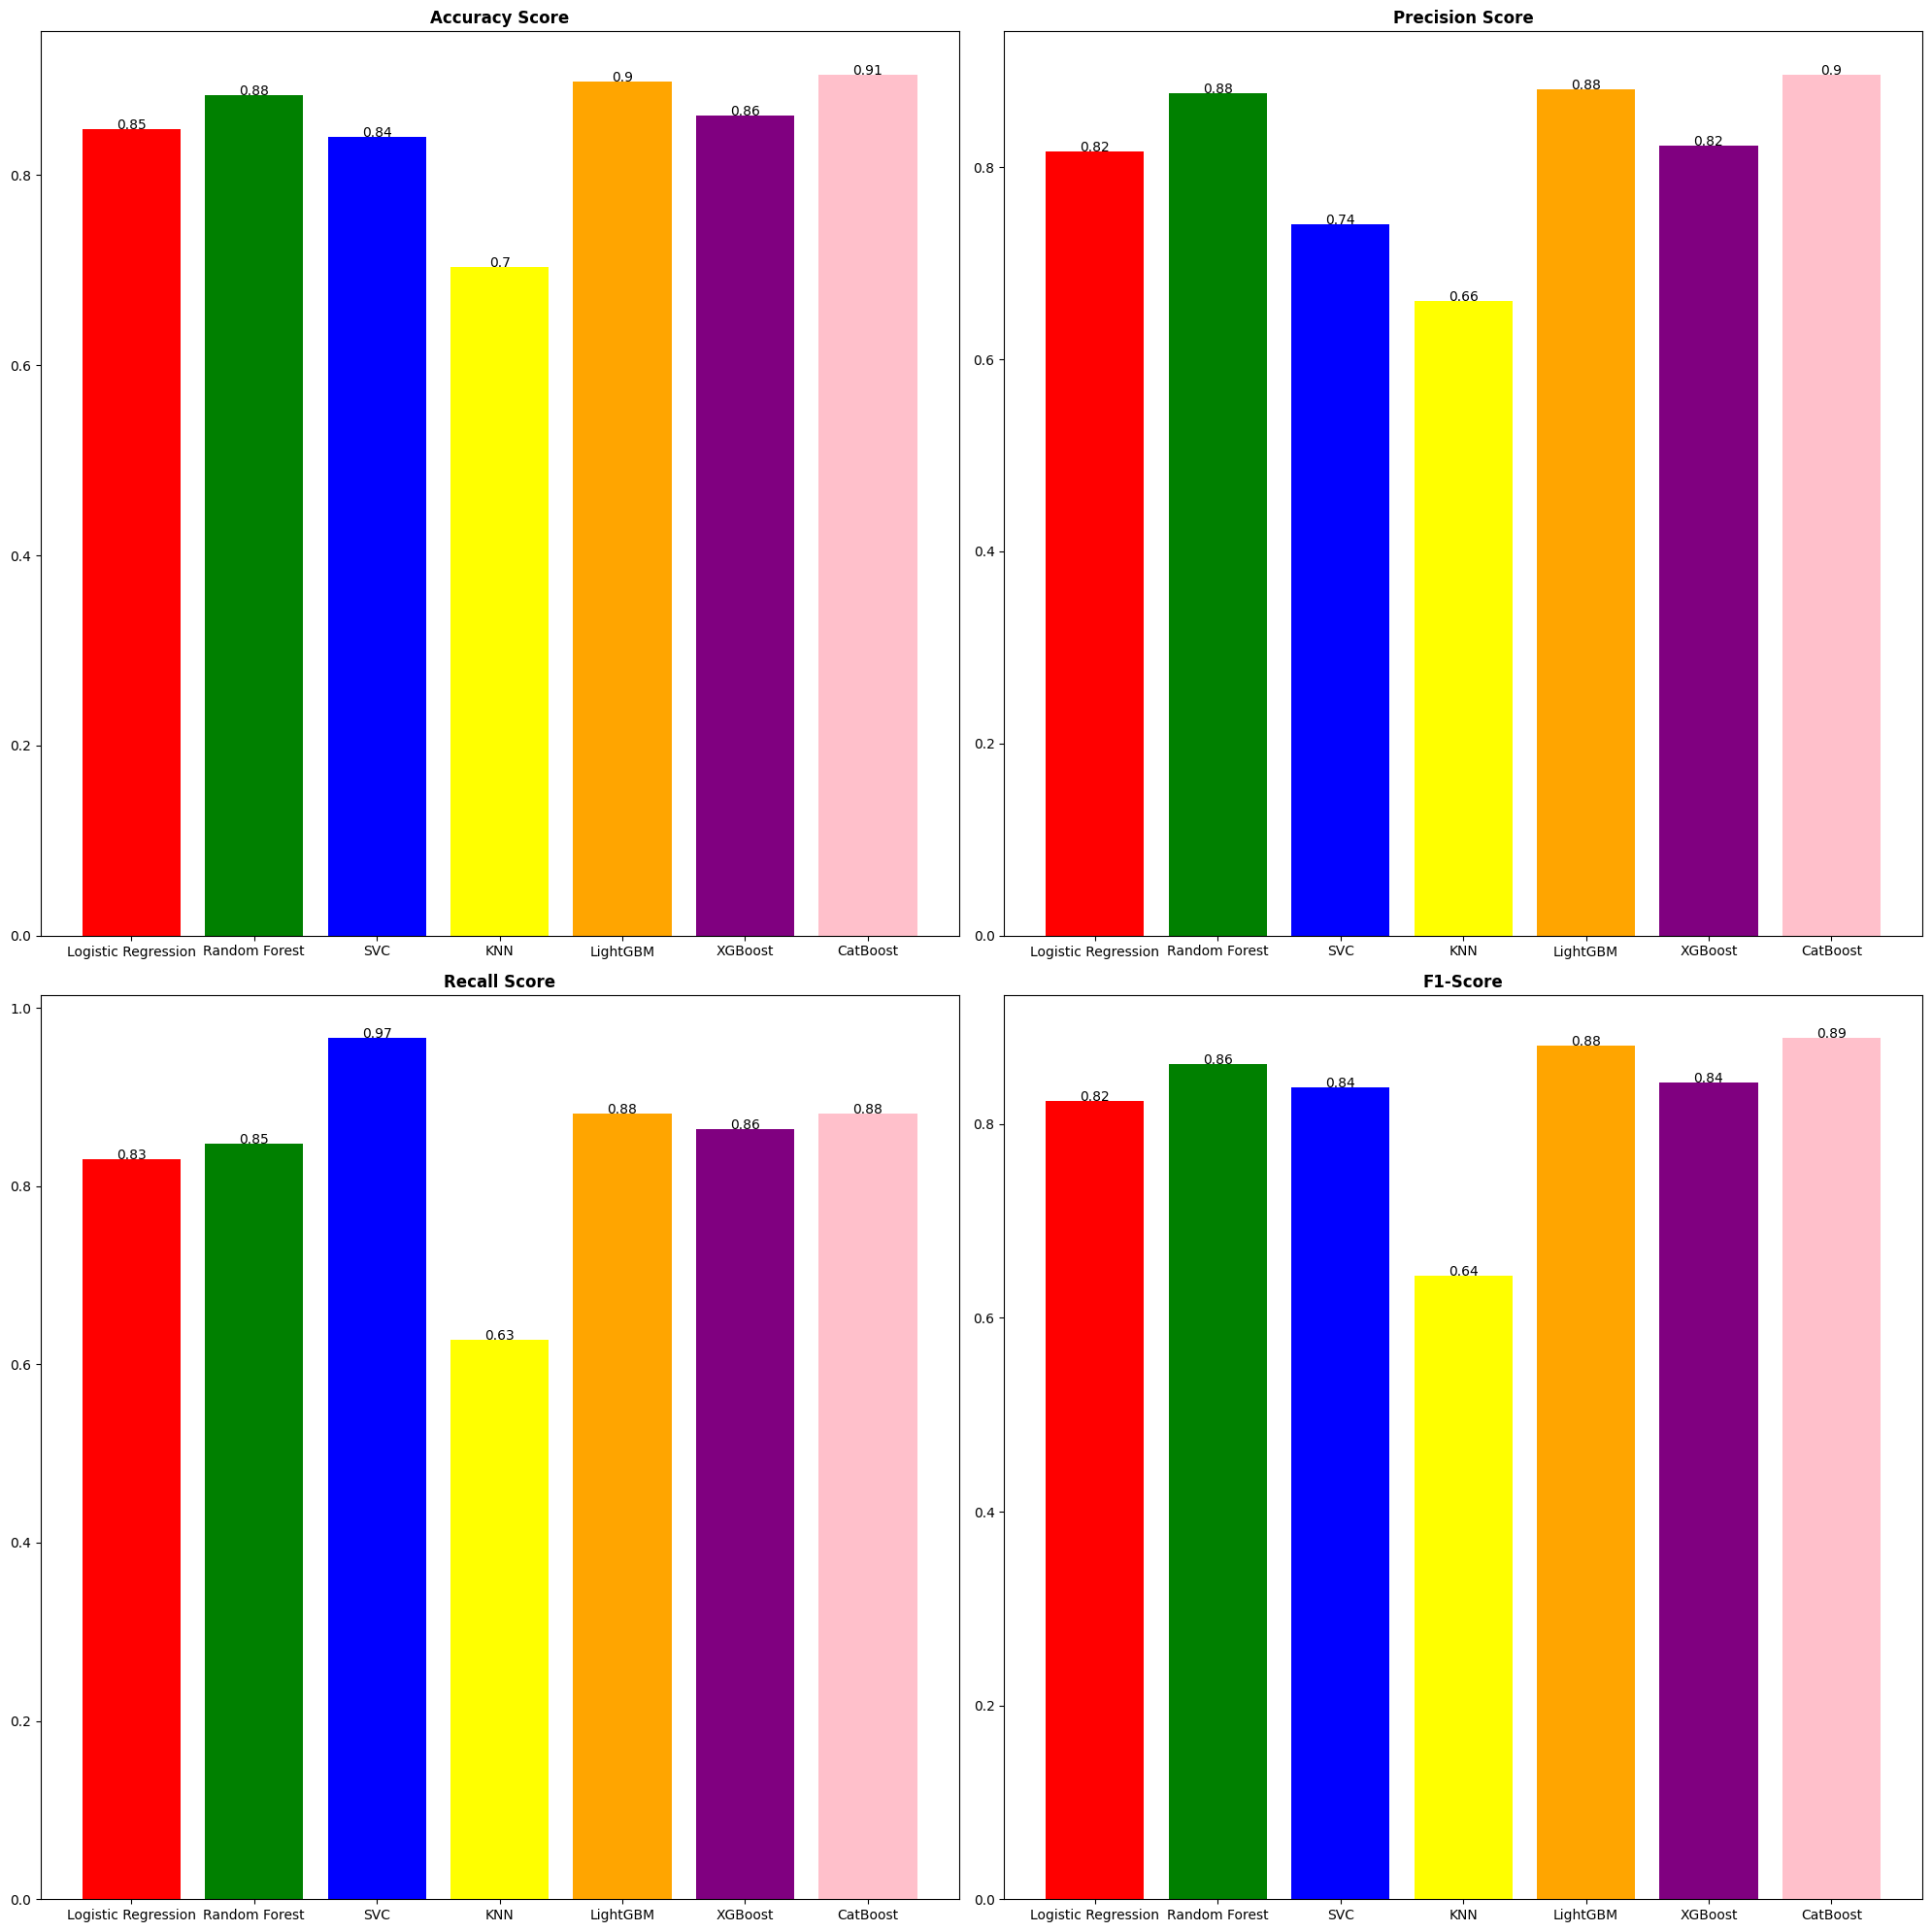

In [67]:
# sub plot the accuracy,precision, recall, f1-score score for all the models  without overloping in the x axis and y axis



plt.figure(figsize=(20, 20))    

plt.subplot(2, 2, 1)

# avoid overlapping in the x axis and y axis

plt.tight_layout()

# value on each bar  with rounded value

for i in range(len([lr_accs_score, rf_accs_score, svc_accs_score, knn_accs_score, lgbm_accs_score, xgb_accs_score, cat_accs_score])):
        plt.text(i, [lr_accs_score, rf_accs_score, svc_accs_score, knn_accs_score, lgbm_accs_score, xgb_accs_score, cat_accs_score][i], round([lr_accs_score, rf_accs_score, svc_accs_score, knn_accs_score, lgbm_accs_score, xgb_accs_score, cat_accs_score][i], 2), ha="center")
plt.bar(["Logistic Regression", "Random Forest", "SVC", "KNN", "LightGBM", "XGBoost", "CatBoost"], [lr_accs_score, rf_accs_score, svc_accs_score, knn_accs_score, lgbm_accs_score, xgb_accs_score, cat_accs_score], color=["red", "green", "blue", "yellow", "orange", "purple", "pink"])
# highlight the title 
plt.title("Accuracy Score", fontweight="bold")


plt.subplot(2, 2, 2)
# value on each bar  with rounded value 
for i in range(len([lr_prec_score, rf_prec_score, svc_prec_score, knn_prec_score, lgbm_prec_score, xgb_prec_score, cat_prec_score])):
        plt.text(i, [lr_prec_score, rf_prec_score, svc_prec_score, knn_prec_score, lgbm_prec_score, xgb_prec_score, cat_prec_score][i], round([lr_prec_score, rf_prec_score, svc_prec_score, knn_prec_score, lgbm_prec_score, xgb_prec_score, cat_prec_score][i], 2), ha="center")

plt.bar(["Logistic Regression", "Random Forest", "SVC", "KNN", "LightGBM", "XGBoost", "CatBoost"], [lr_prec_score, rf_prec_score, svc_prec_score, knn_prec_score, lgbm_prec_score, xgb_prec_score, cat_prec_score], color=["red", "green", "blue", "yellow", "orange", "purple", "pink"])
plt.title("Precision Score", fontweight="bold")



plt.subplot(2, 2, 3)
# value on each bar  with rounded value
for i in range(len([lr_recall_score, rf_recall_score, svc_recall_score, knn_recall_score, lgbm_recall_score, xgb_recall_score, cat_recall_score])):
        plt.text(i, [lr_recall_score, rf_recall_score, svc_recall_score, knn_recall_score, lgbm_recall_score, xgb_recall_score, cat_recall_score][i], round([lr_recall_score, rf_recall_score, svc_recall_score, knn_recall_score, lgbm_recall_score, xgb_recall_score, cat_recall_score][i], 2), ha="center")

plt.bar(["Logistic Regression", "Random Forest", "SVC", "KNN", "LightGBM", "XGBoost", "CatBoost"], [lr_recall_score, rf_recall_score, svc_recall_score, knn_recall_score, lgbm_recall_score, xgb_recall_score, cat_recall_score], color=["red", "green", "blue", "yellow", "orange", "purple", "pink"])

plt.title("Recall Score", fontweight="bold")



plt.subplot(2, 2, 4)
# value on each bar  with rounded value
for i in range(len([lr_f1_score, rf_f1_score, svc_f1_score, knn_f1_score, lgbm_f1_score, xgb_f1_score, cat_f1_score])):
        plt.text(i, [lr_f1_score, rf_f1_score, svc_f1_score, knn_f1_score, lgbm_f1_score, xgb_f1_score, cat_f1_score][i], round([lr_f1_score, rf_f1_score, svc_f1_score, knn_f1_score, lgbm_f1_score, xgb_f1_score, cat_f1_score][i], 2), ha="center")

plt.bar(["Logistic Regression", "Random Forest", "SVC", "KNN", "LightGBM", "XGBoost", "CatBoost"], [lr_f1_score, rf_f1_score, svc_f1_score, knn_f1_score, lgbm_f1_score, xgb_f1_score, cat_f1_score], color=["red", "green", "blue", "yellow", "orange", "purple", "pink"])
# avoid overlapping withe the above plot
plt.tight_layout()
plt.title("F1-Score", fontweight="bold")

plt.show()

# sub plot the accuracy,precision, recall, f1-score score for all the models






Text(0.5, 1.0, 'ROC Score')

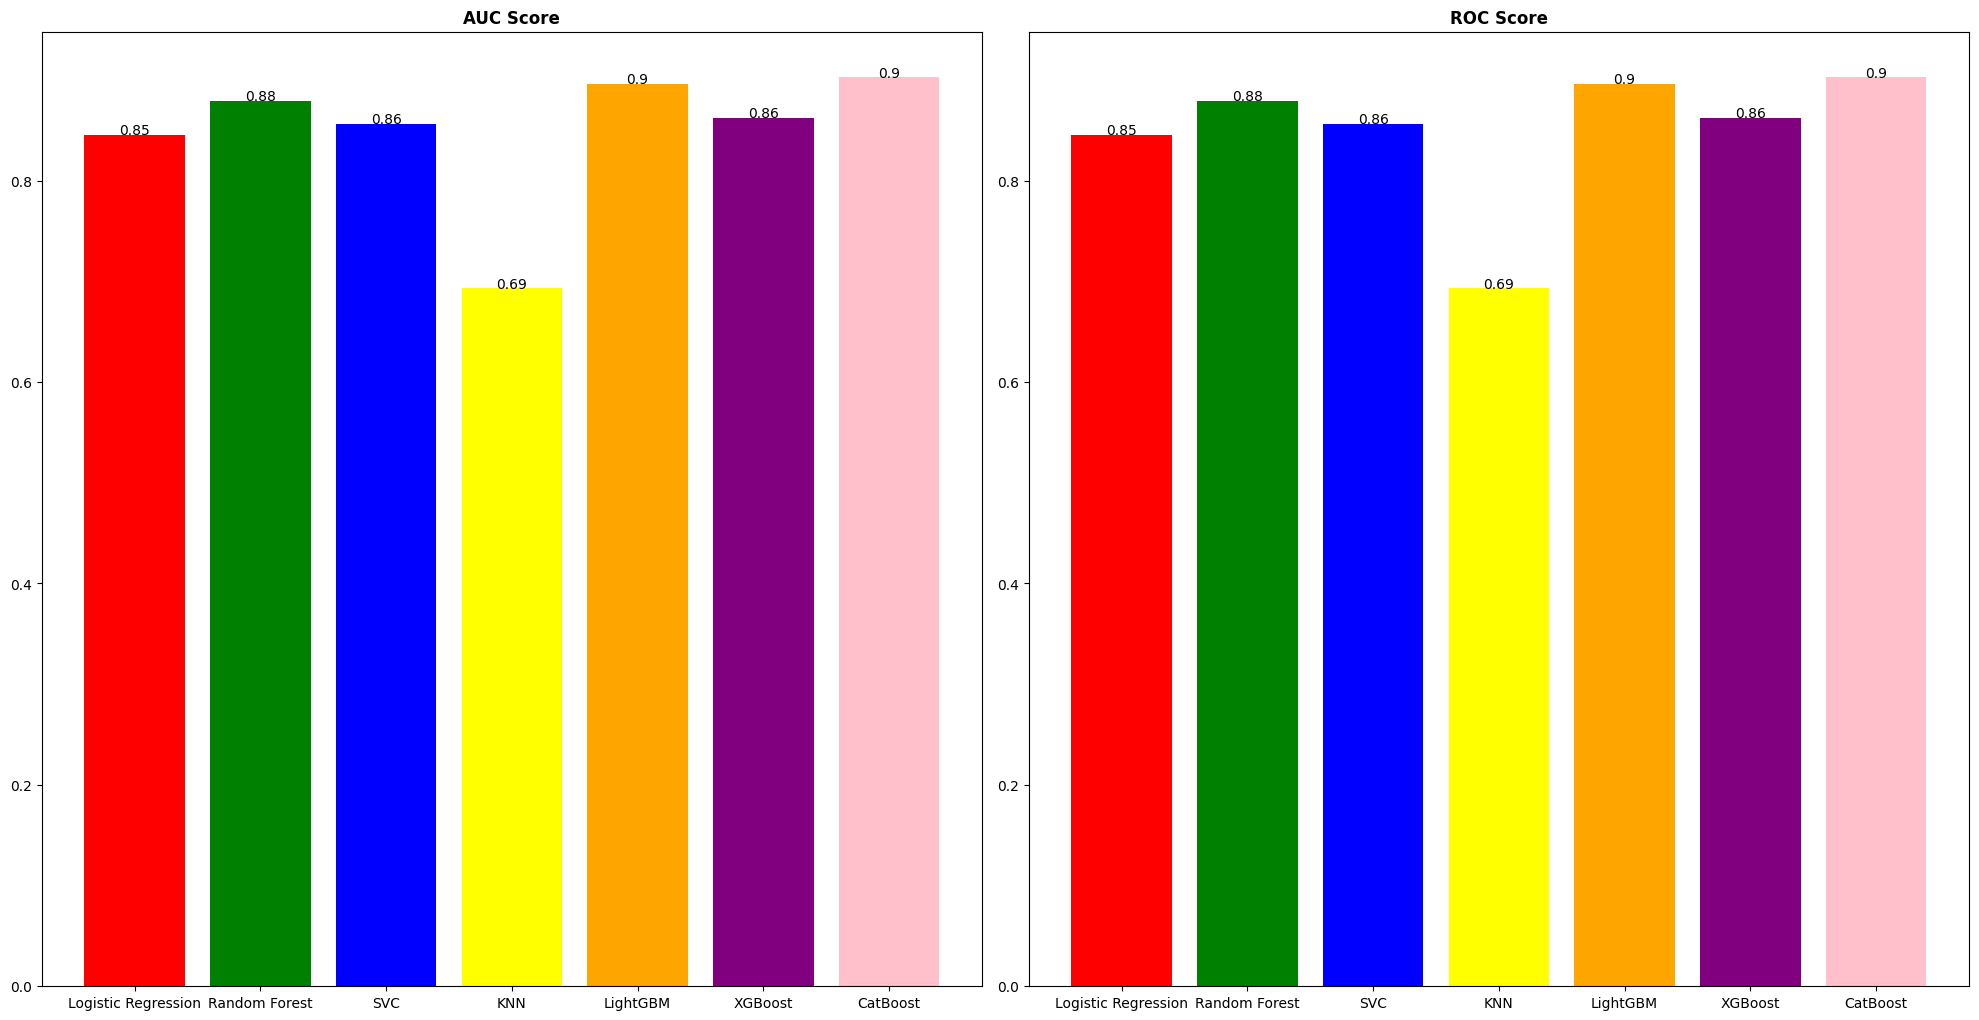

In [68]:
# sub plot the roc , auc curve for all the models  without overloping in the x axis and y axis

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)

# avoid overlapping in the x axis and y axis

plt.tight_layout()

# value on each bar  with rounded value

for i in range(len([lr_auc, rf_auc, svc_auc, knn_auc, lgbm_auc, xgb_auc, cat_auc])):
        plt.text(i, [lr_auc, rf_auc, svc_auc, knn_auc, lgbm_auc, xgb_auc, cat_auc][i], round([lr_auc, rf_auc, svc_auc, knn_auc, lgbm_auc, xgb_auc, cat_auc][i], 2), ha="center")

plt.bar(["Logistic Regression", "Random Forest", "SVC", "KNN", "LightGBM", "XGBoost", "CatBoost"], [lr_auc, rf_auc, svc_auc, knn_auc, lgbm_auc, xgb_auc, cat_auc], color=["red", "green", "blue", "yellow", "orange", "purple", "pink"])

plt.title("AUC Score", fontweight="bold")


plt.subplot(2, 2, 2)


# avoid overlapping in the x axis and y axis

plt.tight_layout()

# value on each bar  with rounded value

# use roc score from the above cells to plot the roc curve using naming convention algorithm_roc_score 

for i in range(len([lr_roc_score, rf_roc_score, svc_roc_score, knn_roc_score, lgbm_roc_score, xgb_roc_score, cat_roc_score])):
        plt.text(i, [lr_roc_score, rf_roc_score, svc_roc_score, knn_roc_score, lgbm_roc_score, xgb_roc_score, cat_roc_score][i], round([lr_roc_score, rf_roc_score, svc_roc_score, knn_roc_score, lgbm_roc_score, xgb_roc_score, cat_roc_score][i], 2), ha="center")


plt.bar(["Logistic Regression", "Random Forest", "SVC", "KNN", "LightGBM", "XGBoost", "CatBoost"], [lr_roc_score, rf_roc_score, svc_roc_score, knn_roc_score, lgbm_roc_score, xgb_roc_score, cat_roc_score], color=["red", "green", "blue", "yellow", "orange", "purple", "pink"])

plt.title("ROC Score", fontweight="bold")









In [ ]:
# from all the analysis we can see that the catboost is the best model for this dataset with the highest accuracy, precision, recall, f1-score, auc score and roc score.
# the reason for the catboost to perform better than the other models is because it is a boosting algorithm and it is a tree based algorithm which is good for classification problems.
# the catboost is also good for handling categorical features and it is also good for handling missing values.
# the catboost is also good for handling outliers. 
